In [7]:
import pandas as pd
import numpy as np
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import re
import csv
import os
plt.style.use('fivethirtyeight')

### Reading job data files and cleaning the data 

In [8]:
# Change working directory
os.chdir('../Data')

In [14]:
df_jobs=pd.read_csv('Monster_LA_Registered_nurses_Scraped_Data_16_04_11_15_2018.csv')
df_jobs_1=pd.read_csv('Monster_Sacramento_Registered_nurses_Scraped_Data_18_31_12_22_2018.csv')
df_jobs_2=pd.read_csv('Monster_Fresno_Registered_nurses_Scraped_Data_14_38_12_23_2018.csv')
df_jobs_3=pd.read_csv('Monster_SD_Registered_nurses_Scraped_Data_14_29_12_22_2018.csv')
df_jobs_4=pd.read_csv('Monster_SF_Registered_nurses_Scraped_Data_02_16_12_23_2018.csv')

In [15]:
df_jobs_1.drop(df_jobs_1.columns[0],axis=1,inplace=True)
df_jobs_1.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_2.drop(df_jobs_2.columns[0],axis=1,inplace=True)
df_jobs_2.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_3.drop(df_jobs_3.columns[0],axis=1,inplace=True)
df_jobs_3.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs_4.drop(df_jobs_4.columns[0],axis=1,inplace=True)
df_jobs_4.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)
df_jobs.drop(df_jobs.columns[0],axis=1,inplace=True)
df_jobs.rename(columns={'0': 'Job_name', '1': 'Company_name', '2': 'Location_name', '3': 'Job_description'}, inplace=True)

In [16]:
df_jobs = df_jobs[df_jobs['Job_name']!='Error loading']
df_jobs_1 = df_jobs_1[df_jobs_1['Job_name']!='Error loading']
df_jobs_2 = df_jobs_2[df_jobs_2['Job_name']!='Error loading']
df_jobs_3 = df_jobs_3[df_jobs_3['Job_name']!='Error loading']
df_jobs_4 = df_jobs_4[df_jobs_4['Job_name']!='Error loading']

In [17]:
df_jobs=df_jobs.append(df_jobs_1)
df_jobs=df_jobs.append(df_jobs_2)
df_jobs=df_jobs.append(df_jobs_3)
df_jobs=df_jobs.append(df_jobs_4)

In [18]:
df_jobs.head()

Job_name  \
0     Registered Nurse (RN) - Travel - Med/Surg Tele   
1  Travel Nurse - ER RN - Emergency Room Register...   
2                Travel Registered Nurse RN Oncology   
3    Director, Complex Case Mgmt-CA (RN, LCSW, LMSW)   
4               RN Obstetrics FT Nights Los Alamitos   

                      Company_name     Location_name  \
0  HealthTrust Workforce Solutions   Los Angeles, CA   
1            ADEX Medical Staffing   Los Angeles, CA   
2                 OneStaff Medical   LOS ANGELES, CA   
3                        Corporate   Los Angeles, CA   
4      Los Alamitos Medical Center  Los Alamitos, CA   

                                     Job_description  
0  Job Description\r\n \r\n Registered Nurse (RN)...  
1  ADEX Travel Nursing has been employing and ser...  
2  Date Posted:2018-11-14\r\nOccupation Category:...  
3  Under the direction of the Vice President Perf...  
4  The dedicated staff, highly-skilled physicians...

In [19]:
df_jobs.tail()

Job_name  \
254  RN Registered Nurse ICU Full Time Nights %2410...   
255  Registered Nurse - On Call - $2,000 Sign-On Bo...   
256            Registered Nurse, Correctional Facility   
257                 Registered Nurse (RN) Hospice Care   
258      Registered Nurse - Med Surg / Tele - Per Diem   

                             Company_name    Location_name  \
254                    Kindred Healthcare  San Leandro, CA   
255               Silverado Senior Living    San Mateo, CA   
256  California Prison Health Care System  San Quentin, CA   
257                      VITAS Healthcare    San Mateo, CA   
258                             ATC- West      Oakland, CA   

                                       Job_description  
254  Description\r\n\r\n%2410,000 Sign-On Bonus for...  
255  $2k Sign On Bonus offered for FT associates!!!...  
256  Registered Nurse, Correctional Facility\r\n$52...  
257  Overview\r\nVITAS Healthcare is the nation’s l...  
258  Registered Nurse – Medical Surgical / Telemetr...

In [20]:
len(df_jobs)

1223

In [21]:
df_jobs.groupby('Job_name').size().sort_values(ascending=False).head()

Job_name
Registered Nurse                                              21
Pediatric Intensive Care - PICU Nurse - Travel - (PICU RN)    14
Telemetry Nurse - Travel - (Tele RN)                          12
Travel Registered Nurse RN Operating Room OR                  12
Home Health Registered Nurse (RN) Case Manager                11
dtype: int64

### Word Cloud Analysis

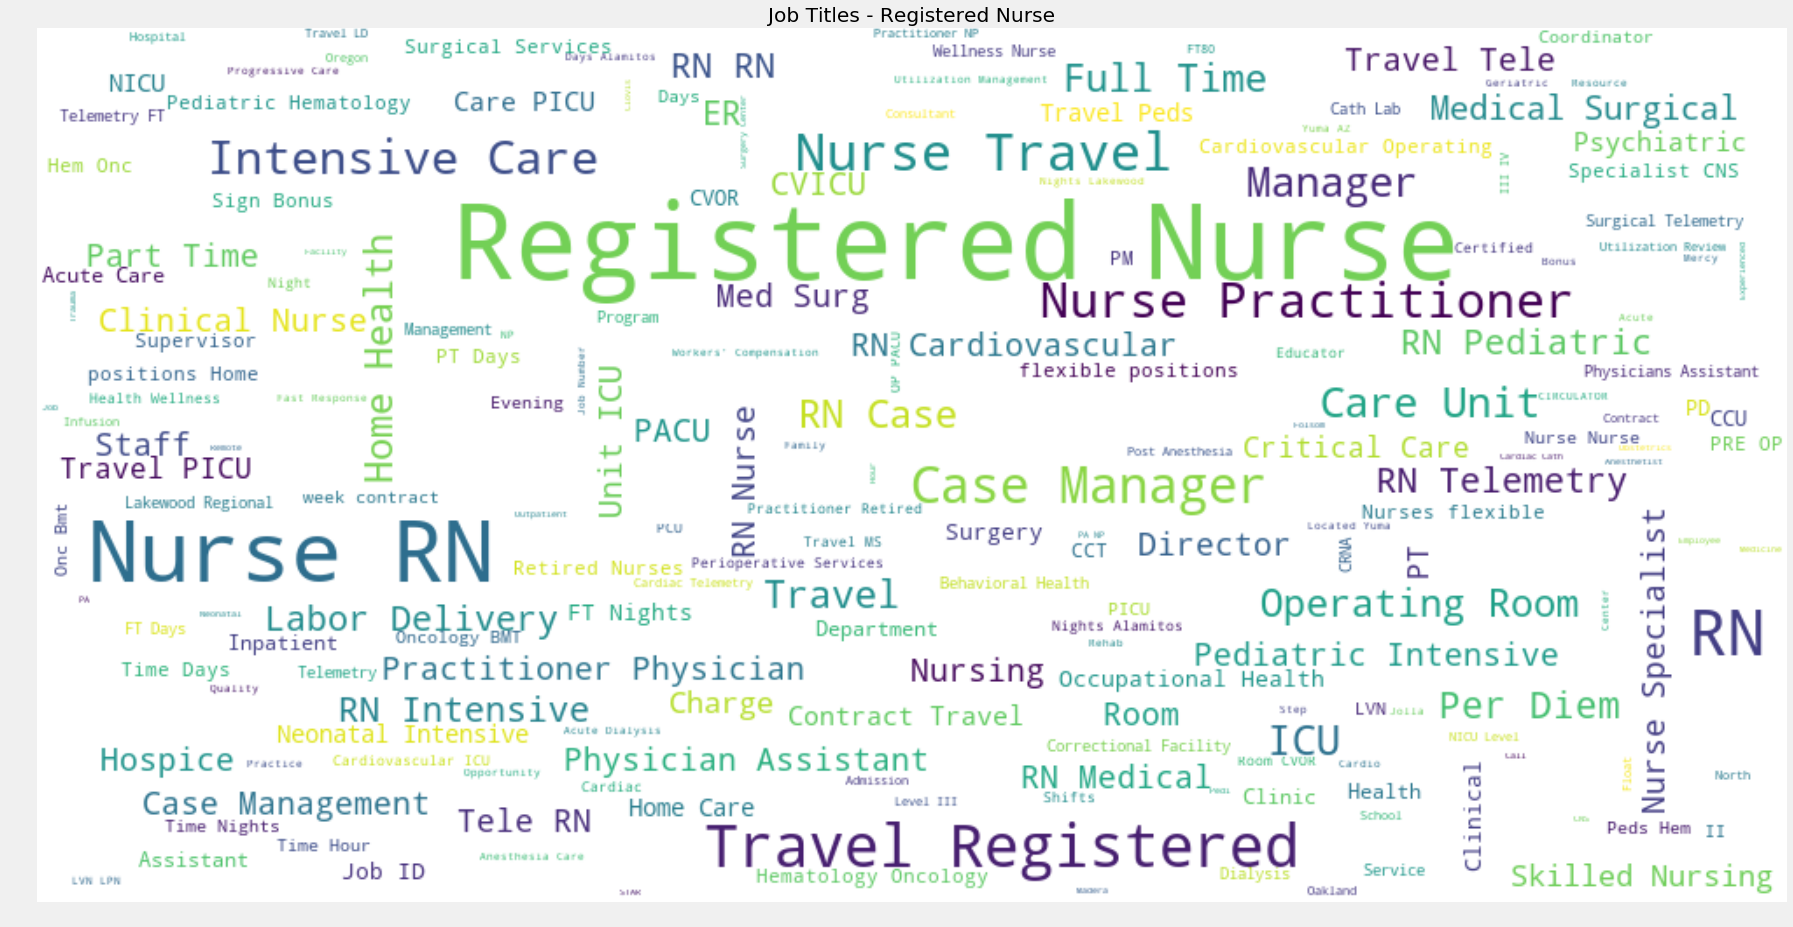

In [30]:
#job titles word clouds
#generating positive reviews word cloud
Job_title_words = ' '.join(str(jt) for jt in df_jobs['Job_name'])

more_stopwords = {'Los Angeles', '91D', 'Angeles', 'Santa', 'Los', 'Hollywood', 'Anaheim', 'Monica', 'Needed', 'LAX',
                 'United', 'Relocation', 'Residential', 'Site', 'company', 'luxury', 'Openings', 'Custom', 'Immediate', 'High', 'Mig', 
                  'Guitar', 'Parking', 'Amazing', 'Top', 'End', 'San', 'Shift', 'CA' , 'Fe','LA','Mixed','Jose', 'Fresno', 'Great', 
                  'Pay', 'California', 'Sacramento', 'Senior', 'Diego', 'Francisco', 'Per Diem', 'Per  Diem', 'flexible positions', 
                  'Emergency Department', 'Emergency', 'week contract', 'PT Days', 'City', 'Day', 'Urgent', 'Full Time',
                  'Full  Time', 'PT Days'
                  
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
Job_title_cleaned_tags = " ".join([word for word in Job_title_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_title_cleaned_tags)
plt.figure( figsize=(30,15) )
plt.title('Job Titles - Registered Nurse')
plt.axis('off')
plt.imshow(wordcloud, interpolation = 'bilinear')
#plt.figure(figsize=(1000,1000))
#plt.show()
plt.savefig('wordcloud_job_titles_registered_nurse.jpeg', bbox_inches='tight')

In [31]:
from nltk.stem import PorterStemmer

In [32]:
porter = PorterStemmer()

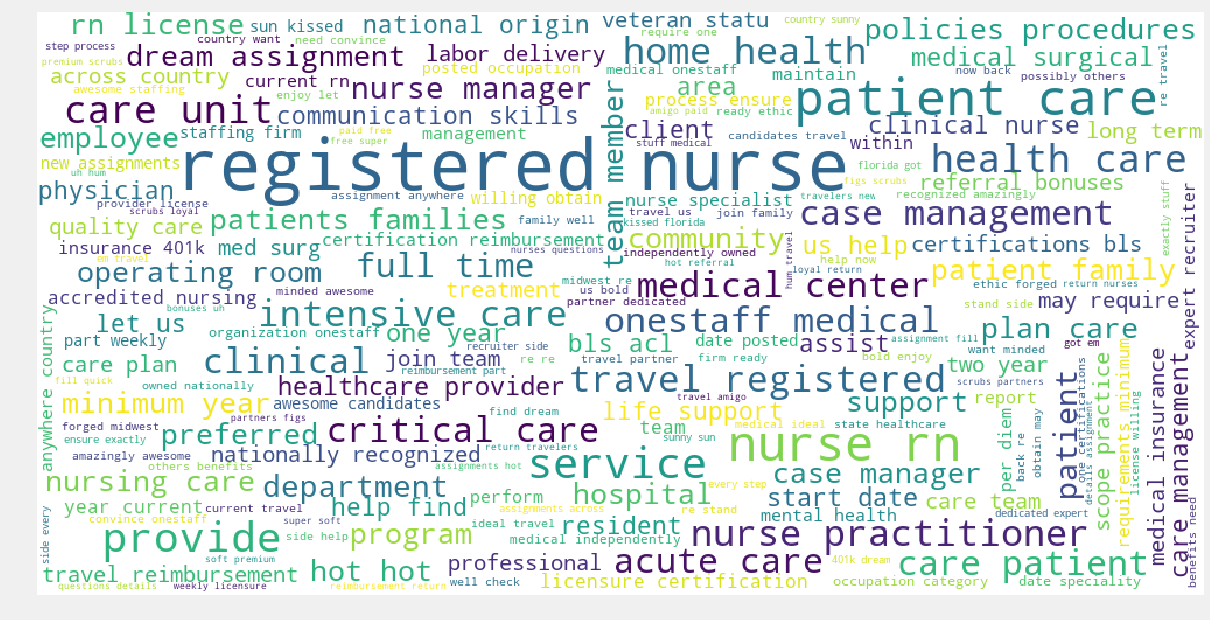

<Figure size 432x288 with 0 Axes>

In [33]:
#job titles word clouds
#generating positive reviews word cloud
Job_desc_words = ' '.join(porter.stem(str(jd)) for jd in df_jobs['Job_description'])

for word in Job_desc_words:
    re.sub(r'[^\w\s]','',word)


more_stopwords = {'sexual orientation', 'contract', 'bachelor', 'degree', 'necessary', 'religion' , 'color', 'looking', 'applicants', 
                  'required', 'use', 'responsibilities', 'experience', 'dental', 'vision', 'orientation', 'sexual', 'California'
                  'opportunities', 'Equal', 'opportunity', 'customer', 'work', 'project', 'including', 'requirement', 'will',
                  'projects', 'position', 'subcontractor', 'gender', 'identity', 'school', 'diploma', 'good', 
                  'job', 'description', 'asked', 'criminal', 'history', 'hiring', 'asked', 'answer', 'apply', 'race,',
                  'color,', 'religion,', 'sex', 'andor'
                 }
STOPWORDS = STOPWORDS.union(more_stopwords)

# remove URLs and words that start with @
Job_desc_cleaned_tags = " ".join([word for word in Job_desc_words.split()
                            ])

wordcloud = WordCloud(
                      #font_path='/Users/hmallajosyula/Library/Fonts/CabinSketch-Bold.ttf',
                      stopwords=STOPWORDS,
                      max_font_size=60,
                      background_color='white',
                      width = 1000,
                      height = 500
                     ).generate(Job_desc_cleaned_tags)
plt.figure( figsize=(20,10) )
plt.imshow(wordcloud)
plt.axis('off')
#plt.figure(figsize=(1000,1000))
plt.show()
plt.savefig('wordcloud_registered_nurse_job_desc.png', bbox_inches='tight')

In [34]:
import nltk
from nltk import FreqDist
from nltk.collocations import *
from nltk.tokenize import *

In [35]:
Job_desc_stopwords_cleaned = " ".join([word for word in Job_desc_words.split() if word.lower() not in STOPWORDS and len(word)>3
                            ])

In [36]:
Job_desc_stopwords_punc_cleaned = " ".join([re.sub(r'[^\w\s]','',word) for word in Job_desc_stopwords_cleaned.split() if word not in STOPWORDS
                            ])

In [37]:
#frequency distribution of positive reviews
long_words = [w.lower() for w in Job_desc_stopwords_punc_cleaned.split()]
fdist1 = FreqDist(long_words)
fdist1.most_common(50)

[('care', 5578),
 ('nurse', 3723),
 ('patient', 2406),
 ('nursing', 2252),
 ('medical', 2247),
 ('health', 2190),
 ('patients', 2184),
 ('registered', 1814),
 ('travel', 1366),
 ('clinical', 1308),
 ('team', 1272),
 ('healthcare', 1161),
 ('california', 1158),
 ('current', 1145),
 ('services', 1076),
 ('hospital', 1040),
 ('staff', 1030),
 ('management', 997),
 ('benefits', 967),
 ('skills', 959),
 ('state', 952),
 ('license', 897),
 ('unit', 800),
 ('years', 794),
 ('center', 784),
 ('plan', 780),
 ('provide', 779),
 ('ability', 762),
 ('nurses', 757),
 ('time', 755),
 ('home', 753),
 ('requirements', 734),
 ('practice', 727),
 ('quality', 714),
 ('education', 707),
 ('must', 688),
 ('certification', 684),
 ('preferred', 668),
 ('manager', 667),
 ('professional', 648),
 ('appropriate', 642),
 ('program', 635),
 ('within', 632),
 ('case', 620),
 ('family', 612),
 ('procedures', 599),
 ('needs', 597),
 ('community', 585),
 ('knowledge', 562),
 ('support', 560)]

In [38]:
fdist2= FreqDist(nltk.ngrams(Job_desc_stopwords_punc_cleaned.split(),2))
fdist2.most_common(300)

[(('registered', 'nurse'), 1514),
 (('patient', 'care'), 700),
 (('care', 'unit'), 394),
 (('health', 'care'), 387),
 (('travel', 'registered'), 365),
 (('intensive', 'care'), 359),
 (('onestaff', 'medical'), 345),
 (('critical', 'care'), 330),
 (('medical', 'center'), 326),
 (('acute', 'care'), 320),
 (('home', 'health'), 320),
 (('case', 'management'), 316),
 (('nurse', 'manager'), 259),
 (('care', 'patients'), 245),
 (('nurse', 'practitioner'), 234),
 (('operating', 'room'), 233),
 (('patients', 'families'), 231),
 (('nurse', 'rn'), 211),
 (('plan', 'care'), 208),
 (('nursing', 'care'), 205),
 (('policies', 'procedures'), 202),
 (('minimum', 'year'), 200),
 (('start', 'date'), 183),
 (('team', 'members'), 182),
 (('case', 'manager'), 171),
 (('care', 'management'), 168),
 (('healthcare', 'provider'), 166),
 (('communication', 'skills'), 166),
 (('clinical', 'nurse'), 166),
 (('registered', 'nurses'), 156),
 (('california', 'state'), 156),
 (('patient', 'family'), 155),
 (('national'

In [39]:
import re
##s = 'vision,'
##s = re.sub(r'[^\w\s]','',s)
#s

In [40]:
with open("bigrams_skills_raw_data_registered_nurse.csv", "w") as fp:
    writer = csv.writer(fp, quoting=csv.QUOTE_ALL)
    writer.writerows(fdist2.most_common(300))

In [41]:
count_words=0
for w in Job_desc_stopwords_punc_cleaned.split():
    count_words = count_words+1
print(count_words)

254500


In [43]:
df_bigrams=pd.read_csv('bigrams_registered_nurse_cleaned_labeled_manually.csv')

In [46]:
df_hardskills = df_bigrams[df_bigrams['Label']=='Hard skill']

In [47]:
len(df_hardskills)

106

In [49]:
df_hardskills.reset_index(inplace=True)

In [50]:
df_hardskills.head()

index             Bigram  Frequency       Label
0      0   registered nurse       1514  Hard skill
1      1       patient care        700  Hard skill
2      2          care unit        394  Hard skill
3      3        health care        387  Hard skill
4      4  travel registered        365  Hard skill

In [51]:
df_hardskills.drop(df_hardskills.columns[0],axis=1,inplace=True)

C:\Users\jbans\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [52]:
df_hardskills.head()

Bigram  Frequency       Label
0   registered nurse       1514  Hard skill
1       patient care        700  Hard skill
2          care unit        394  Hard skill
3        health care        387  Hard skill
4  travel registered        365  Hard skill

In [53]:
df_hardskills.drop(df_hardskills.columns[2],axis=1,inplace=True)

C:\Users\jbans\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [54]:
df_hardskills.head()

Bigram  Frequency
0   registered nurse       1514
1       patient care        700
2          care unit        394
3        health care        387
4  travel registered        365

In [55]:
##top 50 hardskills
df_hardskills_50 = df_hardskills.head(50)

In [56]:
##top 25 hardskills
df_hardskills_25 = df_hardskills.head(25)

In [57]:
word_dict={}

In [58]:
word_dict=pd.Series(df_hardskills.Frequency.values,index=df_hardskills.Bigram).to_dict()

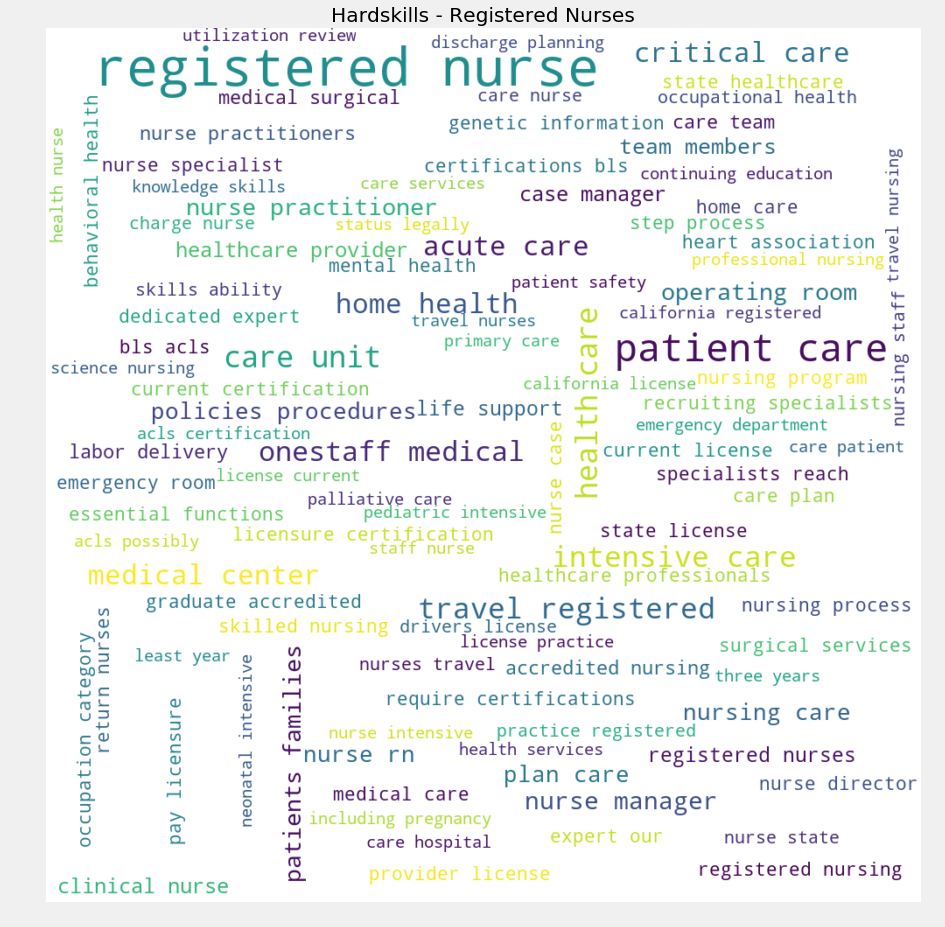

In [59]:

wordCloud = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud.generate_from_frequencies(word_dict)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.title('Hardskills - Registered Nurses')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Registered_Nurse_Hardskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [60]:
word_dict_hs_50=pd.Series(df_hardskills_50.Frequency.values,index=df_hardskills_50.Bigram).to_dict()

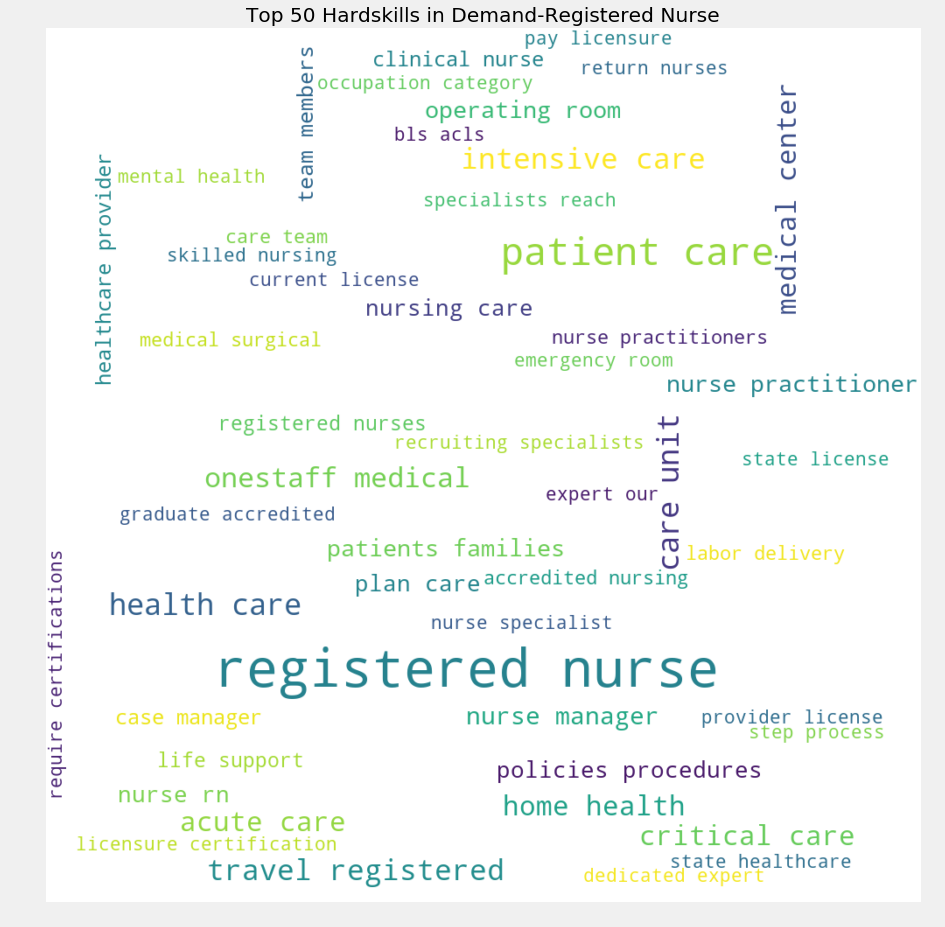

In [61]:
wordCloud_hs_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_50.generate_from_frequencies(word_dict_hs_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Hardskills in Demand-Registered Nurse')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Registered_Nurse_Hardskills_top_50_demand_side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [62]:
word_dict_hs_25=pd.Series(df_hardskills_25.Frequency.values,index=df_hardskills_25.Bigram).to_dict()

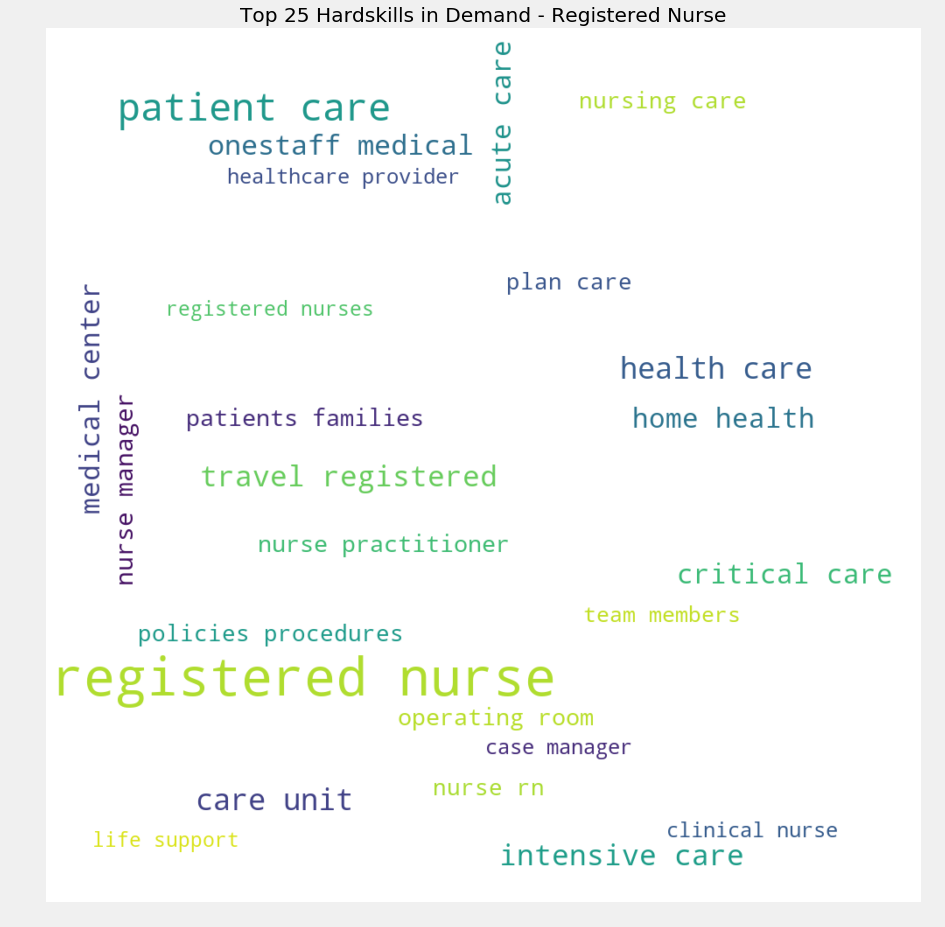

In [63]:
wordCloud_hs_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_hs_25.generate_from_frequencies(word_dict_hs_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_hs_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Hardskills in Demand - Registered Nurse')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Registered_Nurse_Hardskills_top_25_Demand_Side.png', bbox_inches='tight') 
#wordCloud.to_file("Hardskills_frequent_words.png")
 

In [64]:
df_softskills = df_bigrams[df_bigrams['Label']=='Soft skill']

In [65]:
df_softskills.reset_index(inplace=True)

In [66]:
df_softskills.drop(df_softskills.columns[0],axis=1,inplace=True)

C:\Users\jbans\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [67]:
df_softskills.drop(df_softskills.columns[2],axis=1,inplace=True)

C:\Users\jbans\Anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [68]:
df_softskills_50 = df_softskills.head(50)

In [69]:
df_softskills_25 = df_softskills.head(25)

In [70]:
word_dict_ss=pd.Series(df_softskills.Frequency.values,index=df_softskills.Bigram).to_dict()

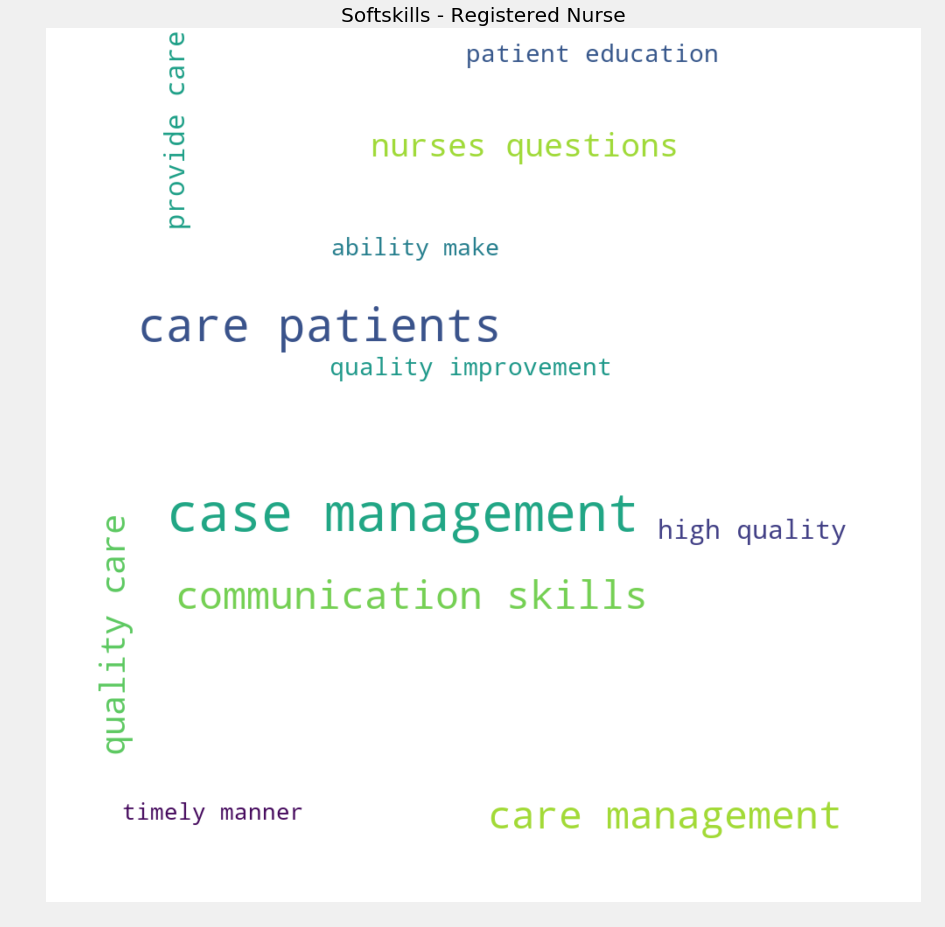

In [71]:
wordCloud_ss = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss.generate_from_frequencies(word_dict_ss)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis(_off")_
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss, interpolation = 'bilinear')
plt.axis('off')
plt.title('Softskills - Registered Nurse')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Registered_Nurse_Softskills_frequent_words.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")
 

In [72]:
word_dict_ss_50=pd.Series(df_softskills_50.Frequency.values,index=df_softskills_50.Bigram).to_dict()

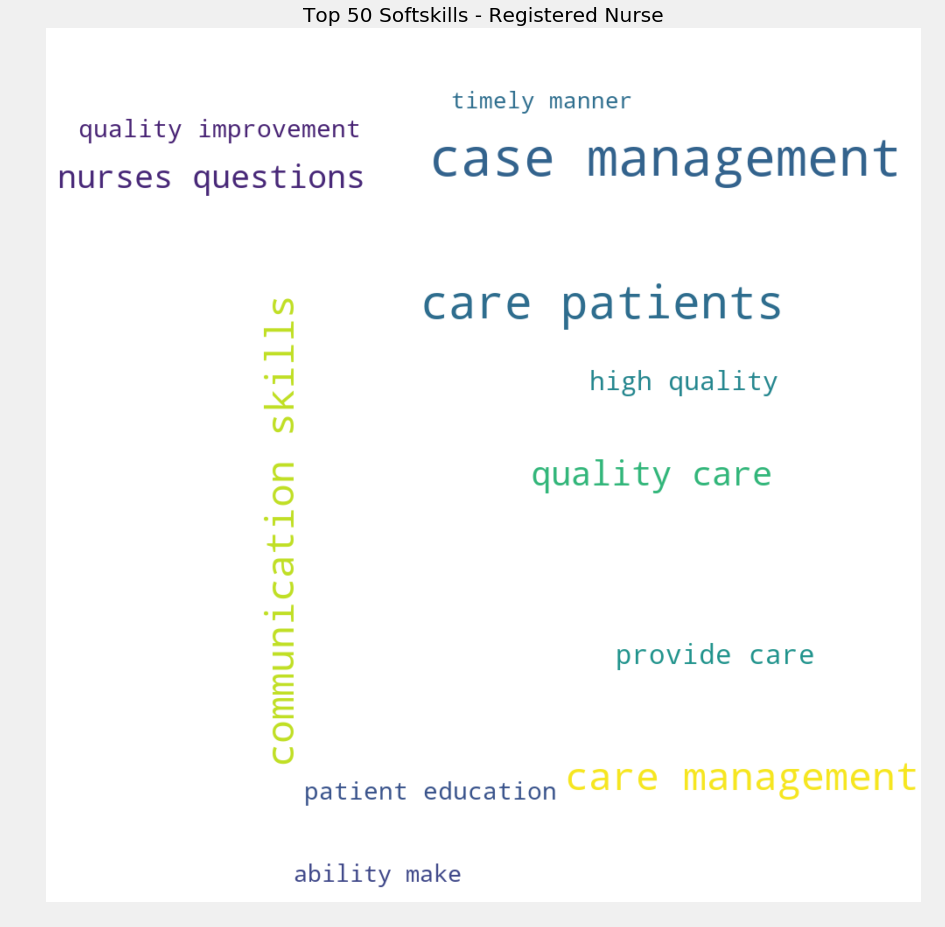

In [73]:
wordCloud_ss_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss_50.generate_from_frequencies(word_dict_ss_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Softskills - Registered Nurse')
#plt.figure(figsize=(1000,1000))
#plt.show()Registered Nurse
#plt.show()
plt.savefig('Registered_Nurse_Softskills_top50_words.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")
 

In [74]:
word_dict_ss_25=pd.Series(df_softskills_25.Frequency.values,index=df_softskills_25.Bigram).to_dict()

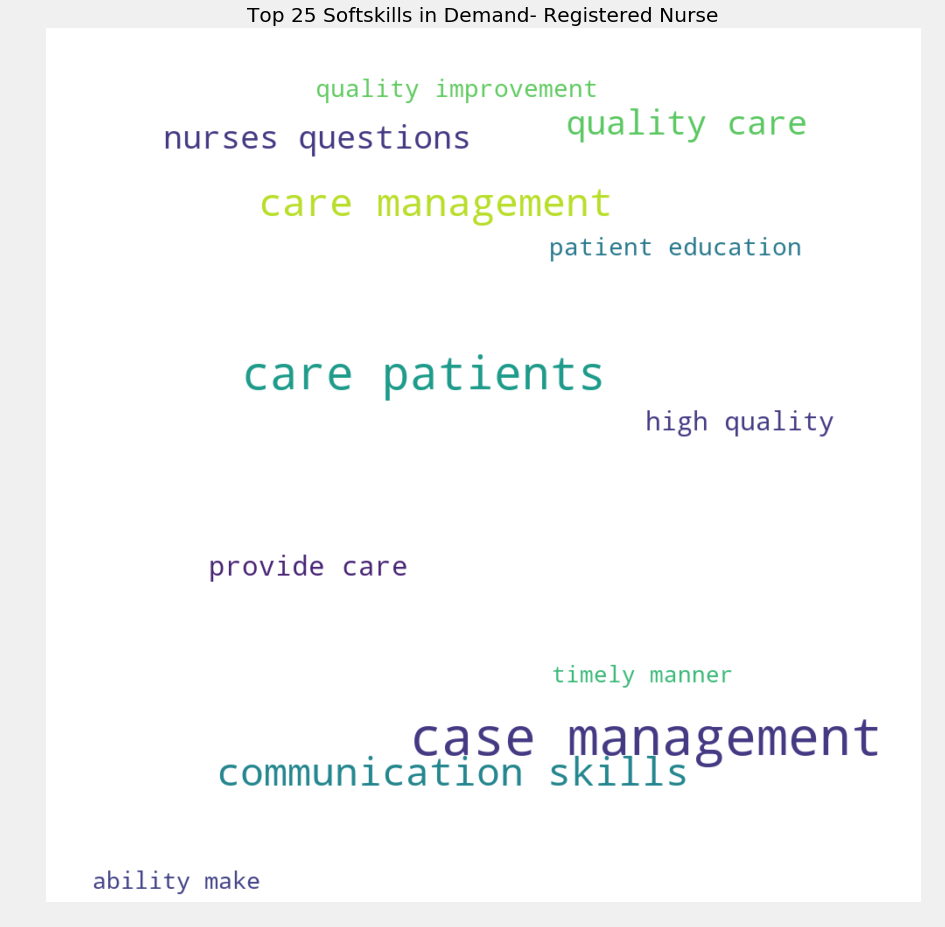

In [75]:
wordCloud_ss_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_ss_25.generate_from_frequencies(word_dict_ss_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_ss_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Softskills in Demand- Registered Nurse')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Registered_Nurse_Softskills_top25_Demand_side.png', bbox_inches='tight') 
#wordCloud.to_file("Softskills_frequent_words.png")

In [ ]:
# NO LABELS WITH BENEFITS...DIDN'T DO ANYTHING BELOW THIS POINT!

In [78]:
df_benefits = df_bigrams[df_bigrams['Label']=='Benefits']

In [79]:
df_benefits.reset_index(inplace=True)

In [80]:
df_benefits.drop(df_benefits.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [81]:
df_benefits.drop(df_benefits.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [82]:
df_benefits.head()

Bigram  Frequency
0    life insurance        131
1    medical dental        116
2     dental vision         92
3  benefits package         92
4     paid holidays         86

In [83]:
df_benefits_50 = df_benefits.head(50)

In [84]:
df_benefits_25 = df_benefits.head(25)

In [85]:
word_dict_b_50=pd.Series(df_benefits_50.Frequency.values,index=df_benefits_50.Bigram).to_dict()

In [86]:
word_dict_b_25=pd.Series(df_benefits_25.Frequency.values,index=df_benefits_25.Bigram).to_dict()

In [87]:
word_dict_b=pd.Series(df_benefits.Frequency.values,index=df_benefits.Bigram).to_dict()

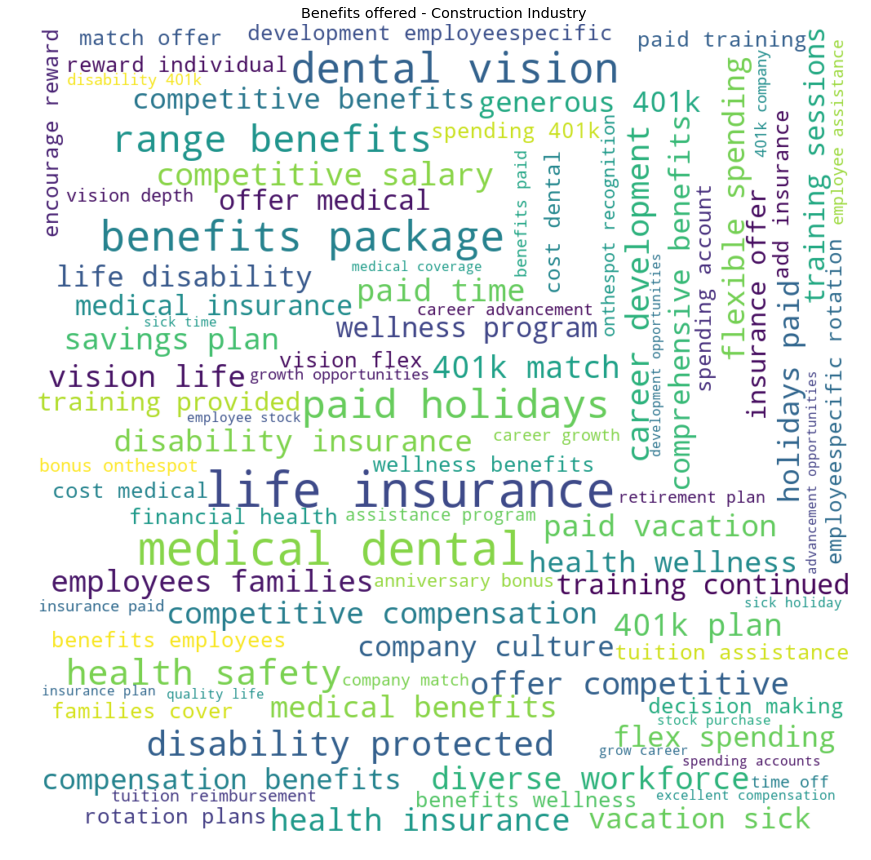

In [88]:
wordCloud_b = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b.generate_from_frequencies(word_dict_b)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b, interpolation = 'bilinear')
plt.axis('off')
plt.title('Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")
 

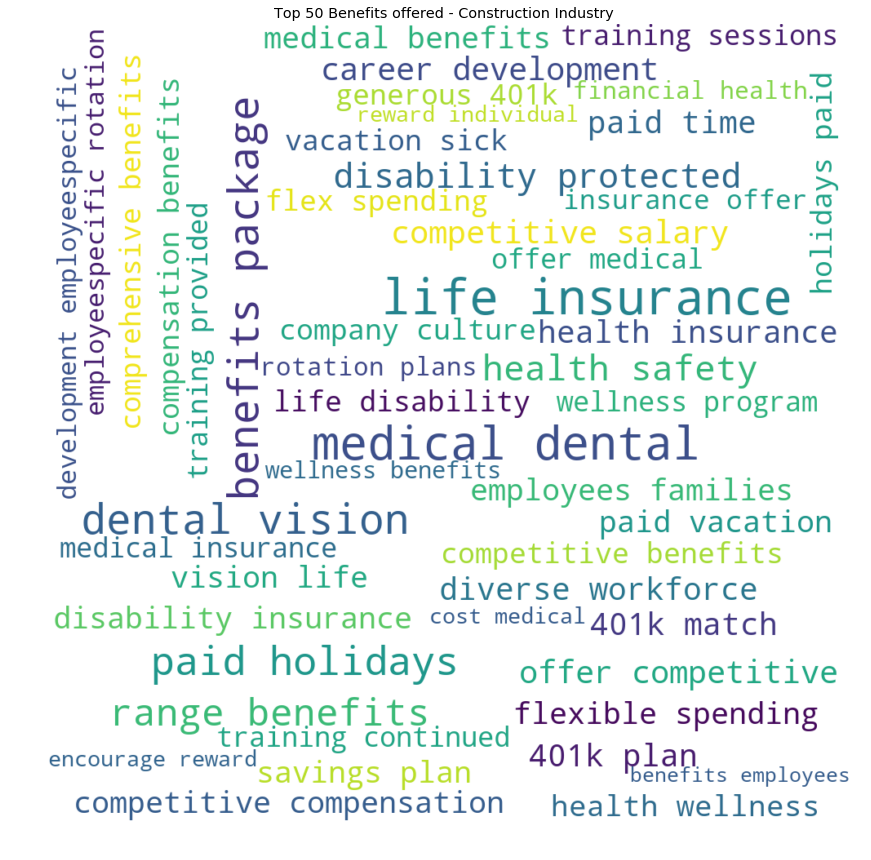

In [103]:
wordCloud_b_50 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b_50.generate_from_frequencies(word_dict_b_50)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b_50, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 50 Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_50_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")

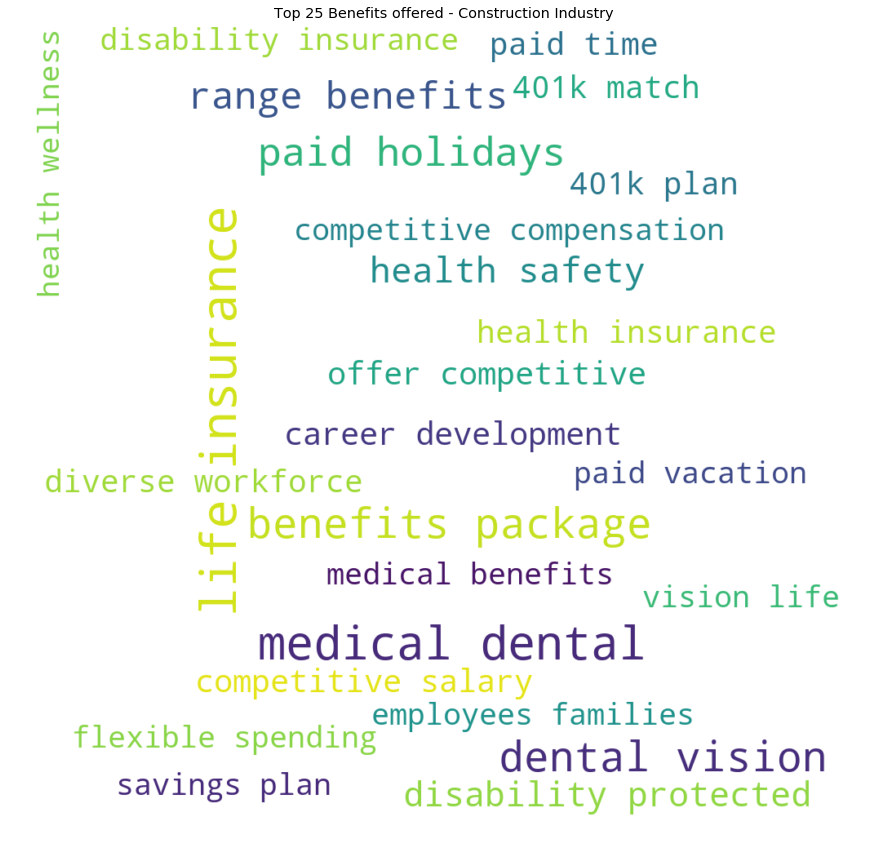

In [89]:
wordCloud_b_25 = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_b_25.generate_from_frequencies(word_dict_b_25)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_b_25, interpolation = 'bilinear')
plt.axis('off')
plt.title('Top 25 Benefits offered - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Benefits_frequent_25_words.png', bbox_inches='tight')  
#wordCloud.to_file("Benefits_frequent_words.png")

In [104]:
df_exp = df_bigrams[df_bigrams['Label']=='Experience Level']

In [105]:
df_exp.head()

Bigram  Frequency             Label
32             five years         72  Experience Level
44      experience please         61  Experience Level
63    seeking experienced         52  Experience Level
70            three years         50  Experience Level
85  combination education         47  Experience Level

In [106]:
df_exp.reset_index(inplace=True)

In [107]:
df_exp.drop(df_exp.columns[0],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [108]:
df_exp.drop(df_exp.columns[2],axis=1,inplace=True)

C:\Users\myrtmp235\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [109]:
word_dict_e=pd.Series(df_exp.Frequency.values,index=df_exp.Bigram).to_dict()

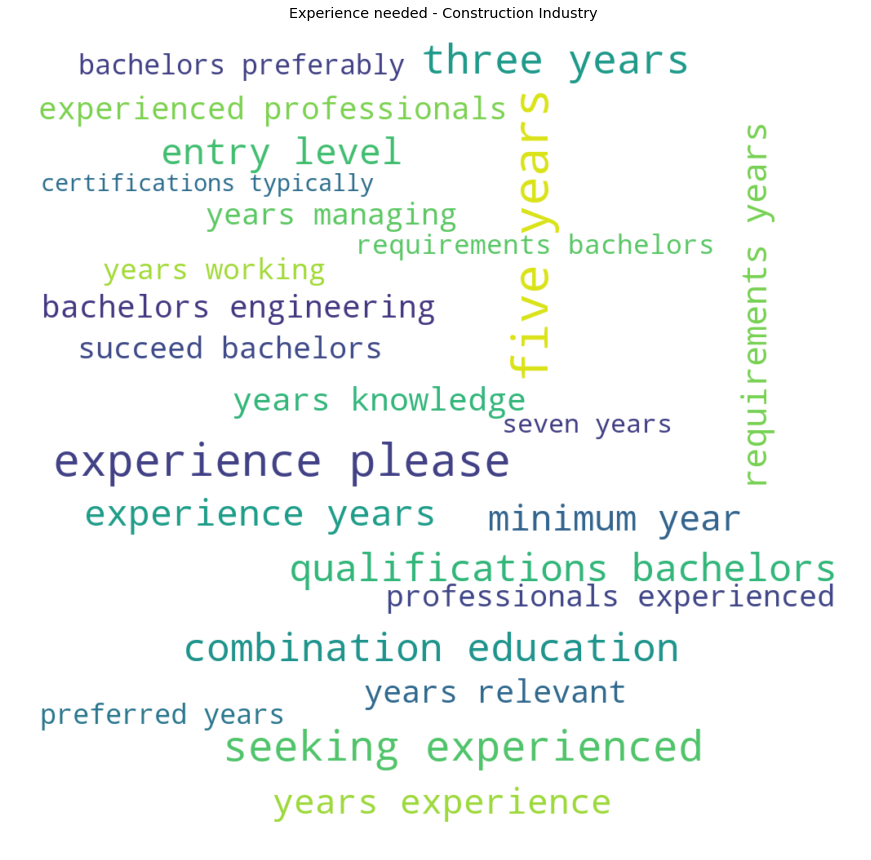

In [110]:
wordCloud_e = WordCloud(max_font_size=60, 
                      background_color='white',
                      width = 1000,
                      height = 1000)
 
wordCloud_e.generate_from_frequencies(word_dict_e)
#plt.imshow(wordCloud, interpolation='bilinear')
#plt.axis("off")
plt.figure( figsize=(30,15) )
plt.imshow(wordCloud_e, interpolation = 'bilinear')
plt.axis('off')
plt.title('Experience needed - Construction Industry')
#plt.figure(figsize=(1000,1000))
#plt.show()
#plt.show()
plt.savefig('Experience_frequent_words.png', bbox_inches='tight')  
#wordCloud.to_file("Experience_frequent_words.png")
 